# CS5565-0007 Final Project - Section A - Thomas Jones

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import requests
import io


In [2]:
RANDOM_SEED = 6472

## Load data

In [3]:
url = 'https://raw.githubusercontent.com/wortcook/UMKC/refs/heads/main/Fall2024/CS5565-0007/finalproj/winequality-red.csv'
s = requests.get(url).content
raw_data = pd.read_csv(io.StringIO(s.decode('utf-8')))
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Clean

In [4]:
#Check for missing values
raw_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Look over unique values

In [5]:
#Unique values in each column
for col in raw_data.columns:
    print(col, raw_data[col].nunique())

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


## Data analysis

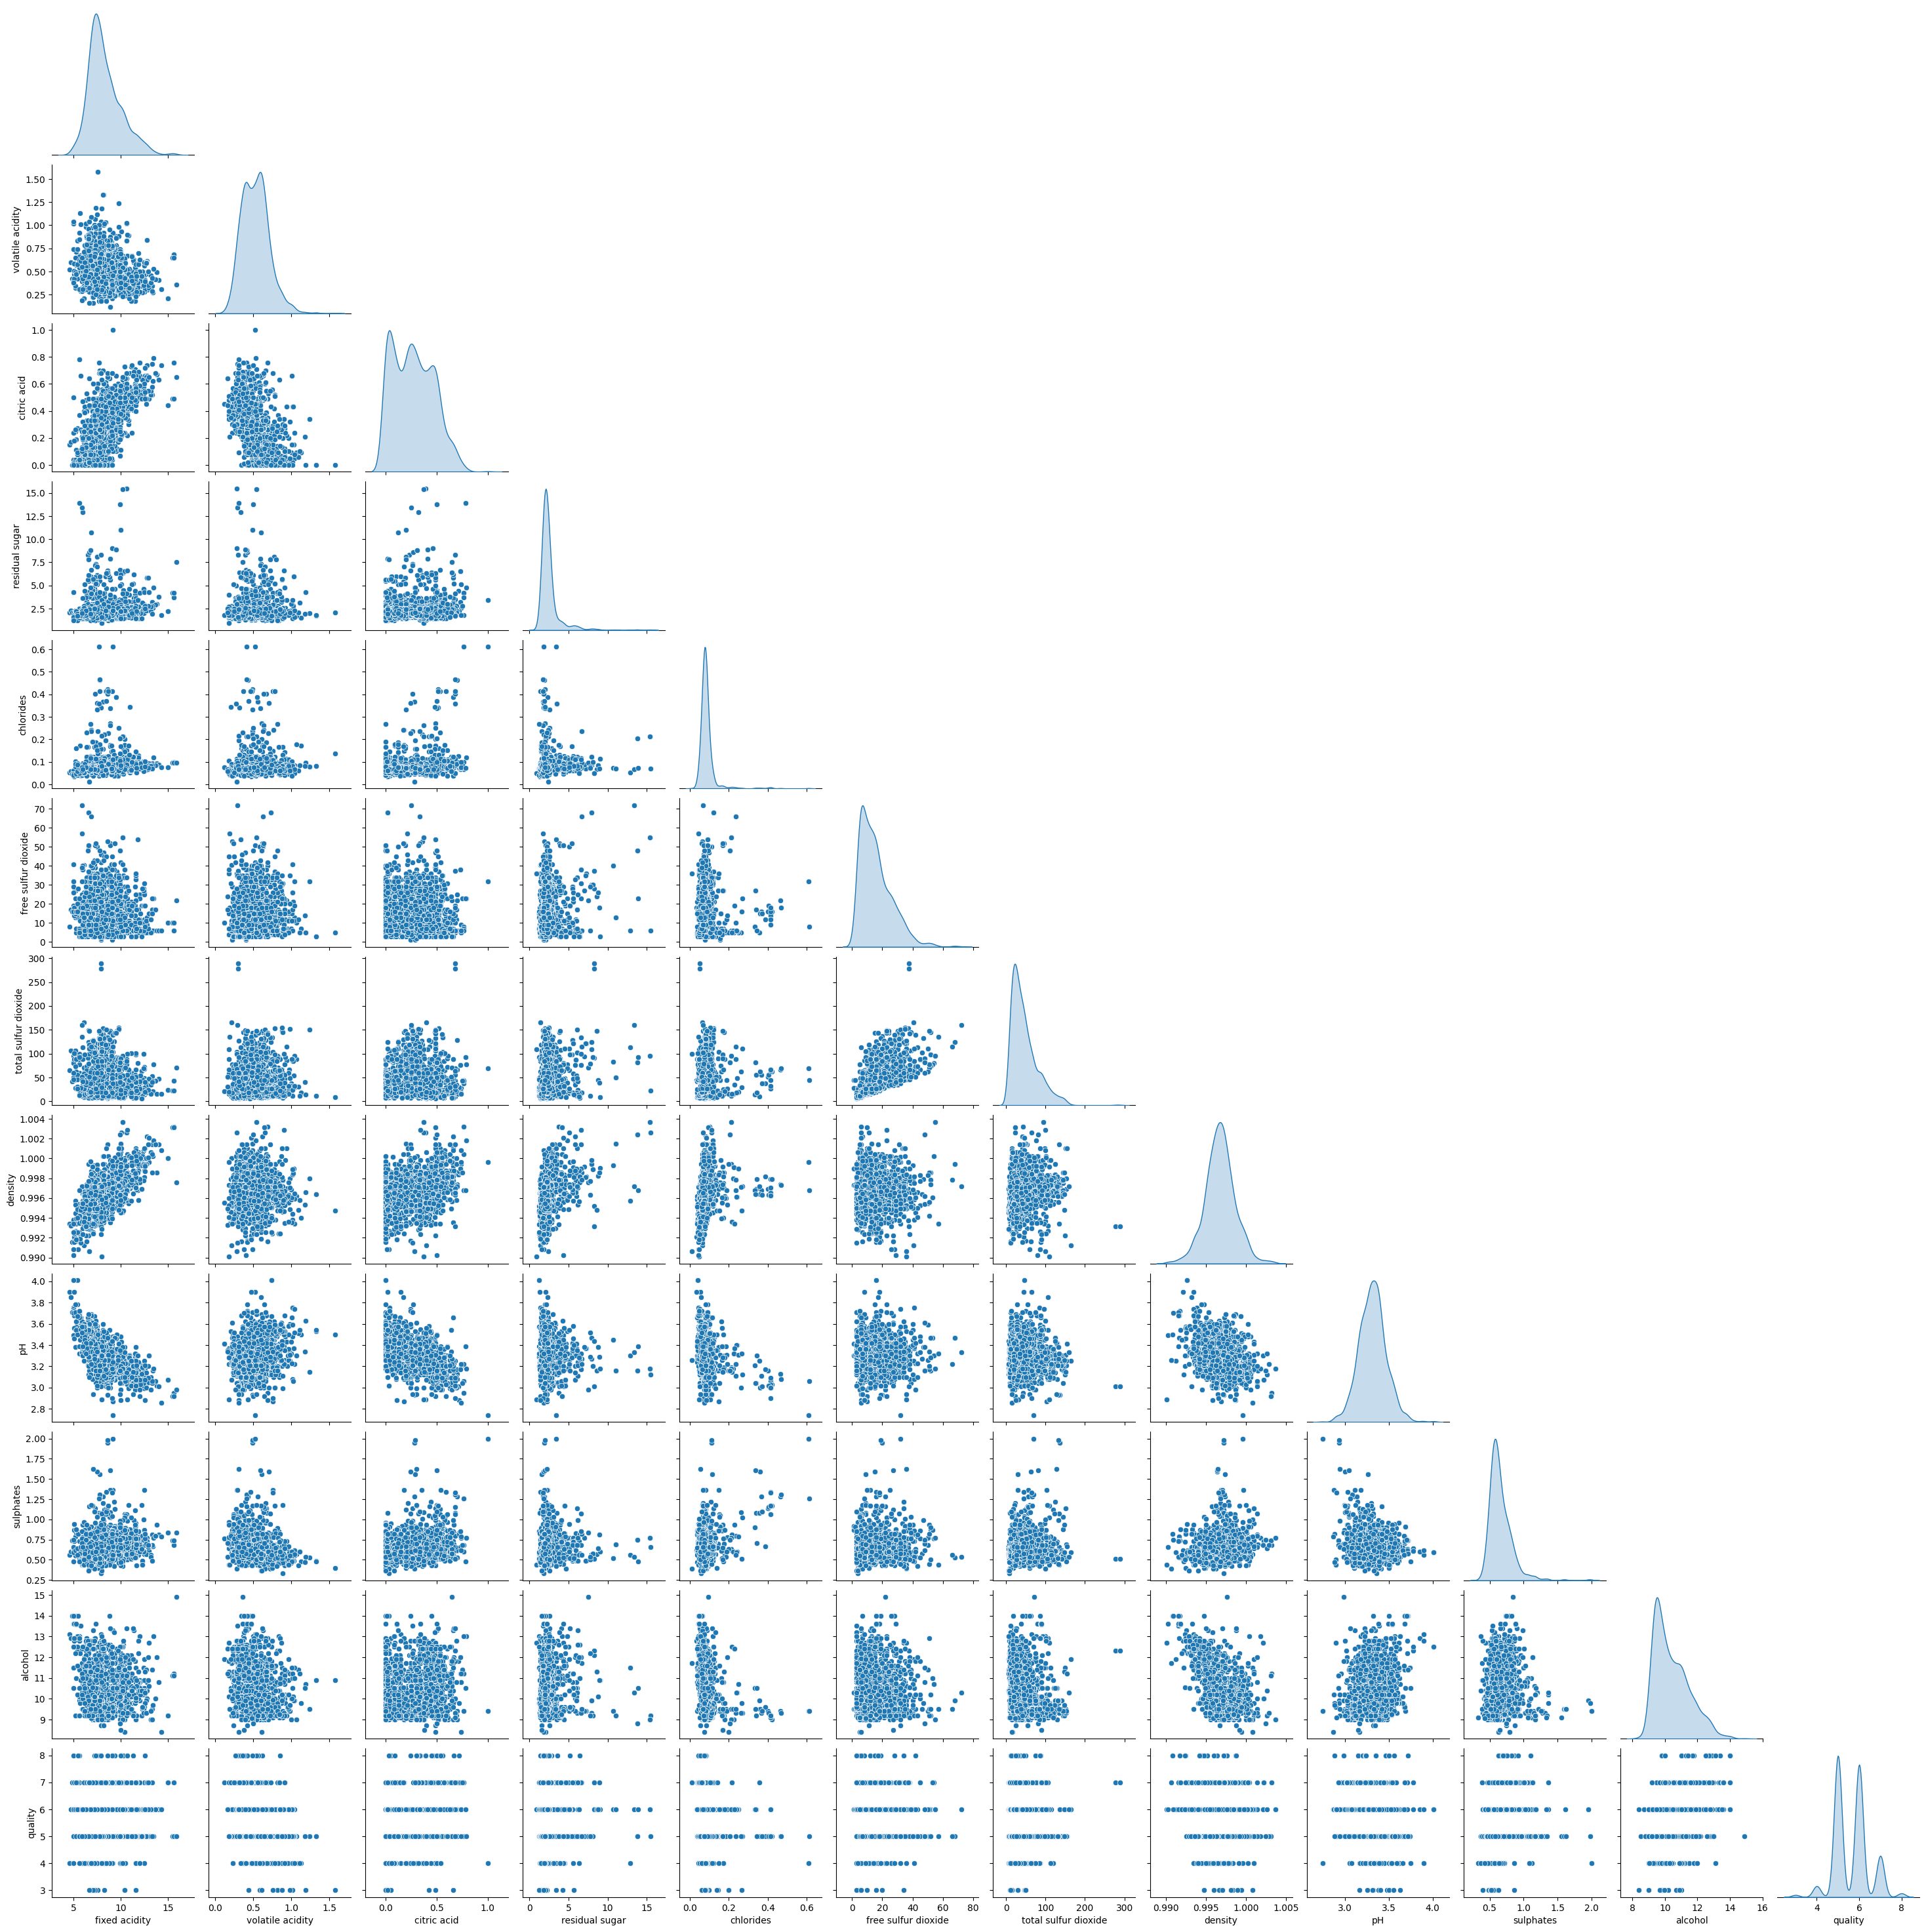

In [6]:
#get pairplot for the obviously numerical columns
sns.pairplot(raw_data, diag_kind='kde', corner=True)


## Look for correlation within the data.

<Axes: >

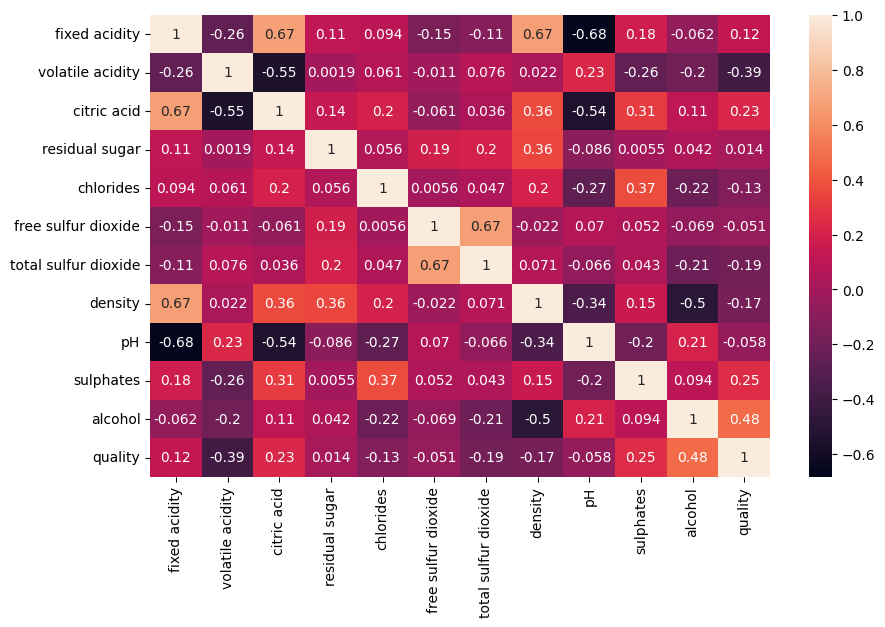

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.corr(), annot=True)

## Dataset creation

We are going to use quality as our reqression target.

In [8]:
X = raw_data.drop('alcohol', axis=1)
Y = raw_data['alcohol']

#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

#Set column names back
X_scaled.columns = X.columns





# Section A

## Part 1 - Linear Regression

Alcohol has the high correlation with quality so we'll fit that first.

Mean Squared Error: 0.8659291296380476
R2 Score: 0.22354219648594542


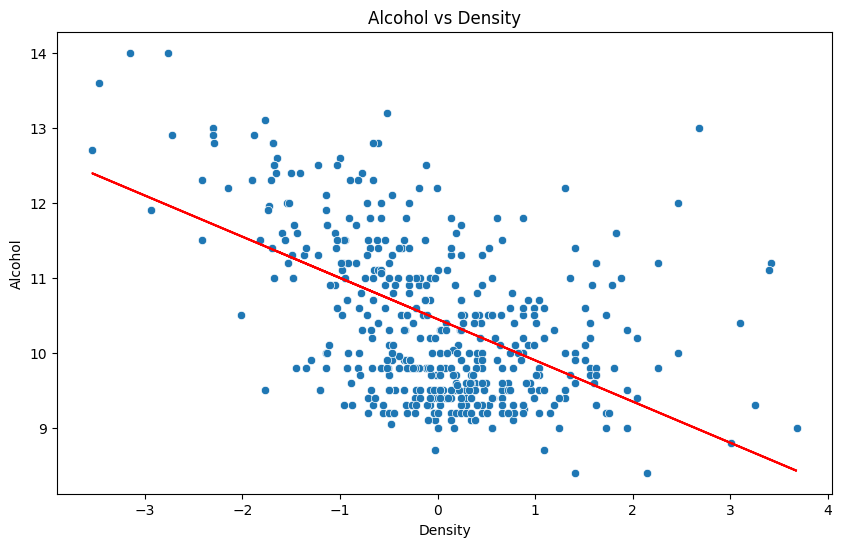

In [9]:
from sklearn.linear_model import LinearRegression

X_density = X_scaled['density'].values.reshape(-1, 1)


#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_density, Y, test_size=0.3, random_state=RANDOM_SEED)

#Create a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

#Predict the quality of the wine
Y_pred = lin_model.predict(X_test)

#Check the accuracy of the model
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('R2 Score:', lin_model.score(X_test, Y_test))

#Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.flatten(), y=Y_test)
plt.plot(X_test.flatten(), Y_pred, color='red')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Density')
plt.show()




This is obviously not a very good result. The data is clearly not linear to a single value.

We can also look at poly fit based on Alcohol content alone as well.

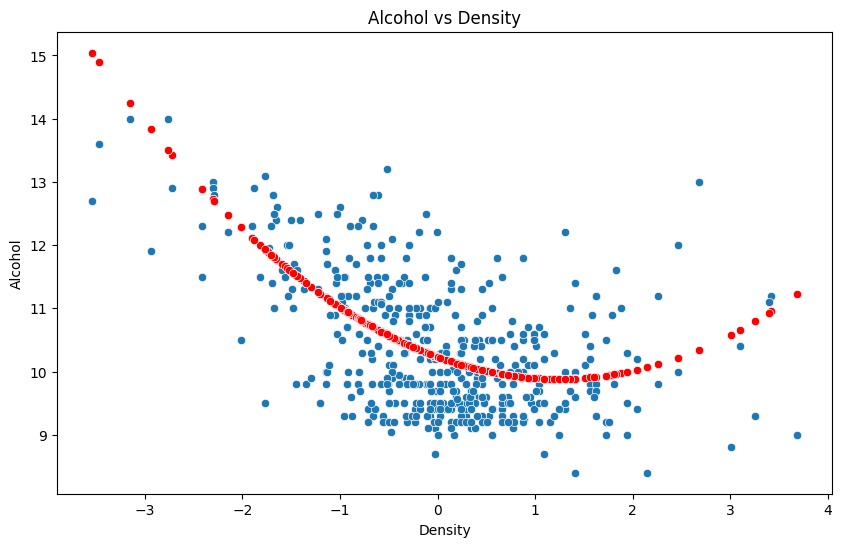

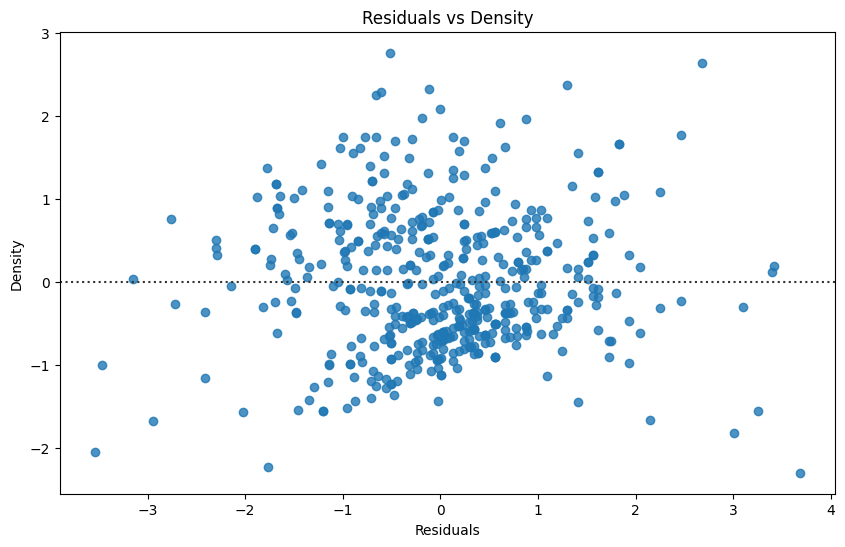

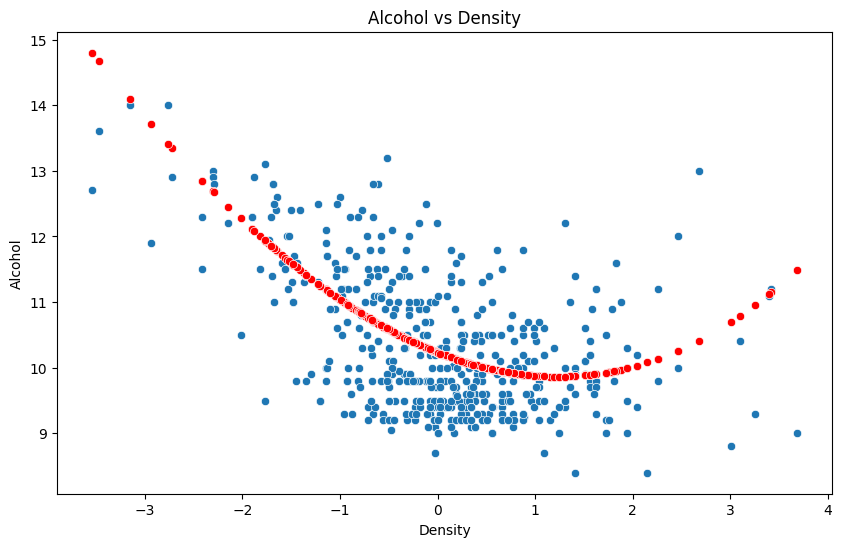

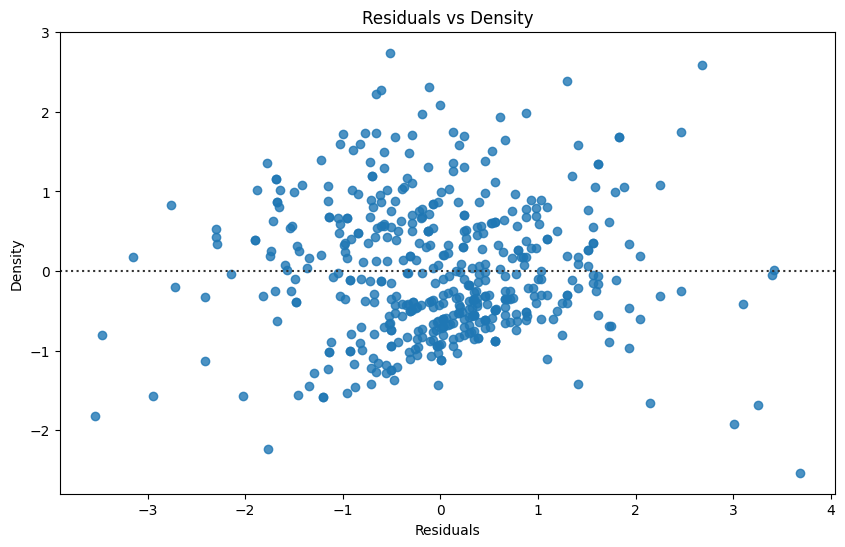

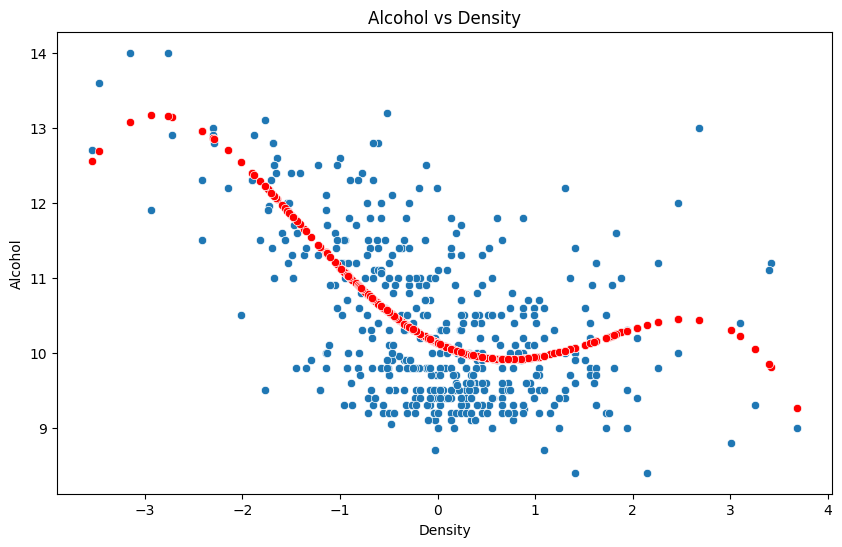

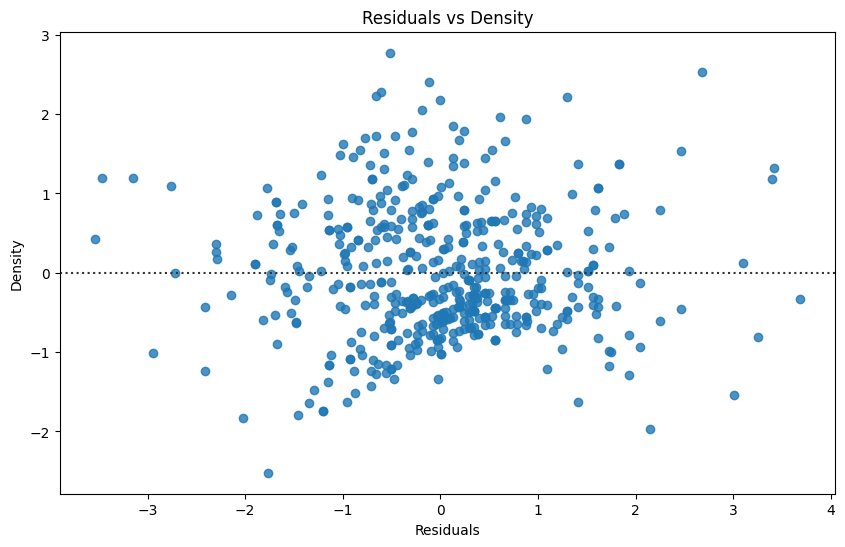

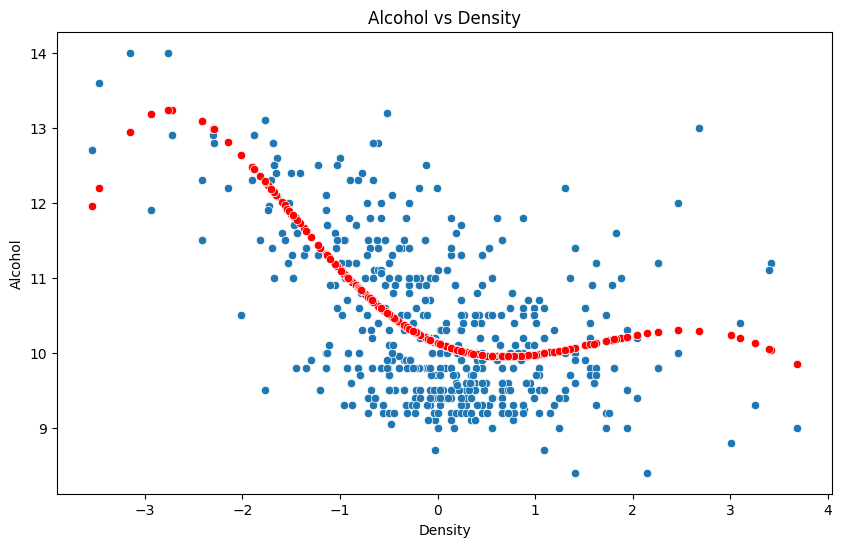

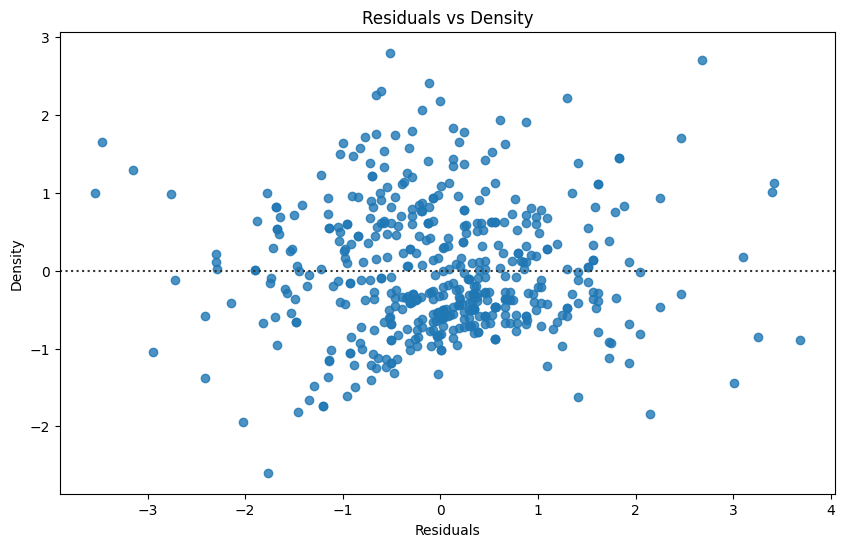

+--------+--------------------+---------------------+
| Degree | Mean Squared Error |       R2 Score      |
+--------+--------------------+---------------------+
|   2    | 0.7278568942954574 | 0.34734824586228996 |
|   3    | 0.727090861248048  |  0.3480351292538434 |
|   4    | 0.6999610409980525 | 0.37236178592821556 |
|   5    | 0.7081564105335085 |  0.3650131953672927 |
+--------+--------------------+---------------------+


In [10]:
#Polyfit regression
from sklearn.preprocessing import PolynomialFeatures

#print the MSE and R2 score as a table
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Degree', 'Mean Squared Error', 'R2 Score']


for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_density)

    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=RANDOM_SEED)

    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    Y_pred = lin_model.predict(X_test)

    table.add_row([i, mean_squared_error(Y_test, Y_pred), lin_model.score(X_test, Y_test)])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[:,1], y=Y_test)
    sns.scatterplot(x=X_test[:,1], y=Y_pred, color='red')
    plt.ylabel('Alcohol')
    plt.xlabel('Density')
    plt.title('Alcohol vs Density')
    plt.show()

    #plot Residuals
    plt.figure(figsize=(10, 6))
    sns.residplot(x=X_test[:,1], y=Y_test-Y_pred)
    plt.ylabel('Density')
    plt.xlabel('Residuals')
    plt.title('Residuals vs Density')
    plt.show()

print(table)







## Multi-feature Regression
The previous single regressions show the issue with a single value where the relationship is not simple. As we are using a small dataset and the models are simple we'll include all the features for the remaining fits.

+--------+---------------------+------------------------+
| Degree |  Mean Squared Error |        R2 Score        |
+--------+---------------------+------------------------+
|   1    |  0.3748594229658791 |   0.6638725800755836   |
|   2    | 0.28508554068059894 |   0.7443706590364962   |
|   3    |  1.1183386100689097 | -0.0027873079197919814 |
|   4    |  1919.7178350477677 |  -1720.3647659491467   |
|   5    |  4146068038810.7812 |  -3717679394824.8403   |
+--------+---------------------+------------------------+


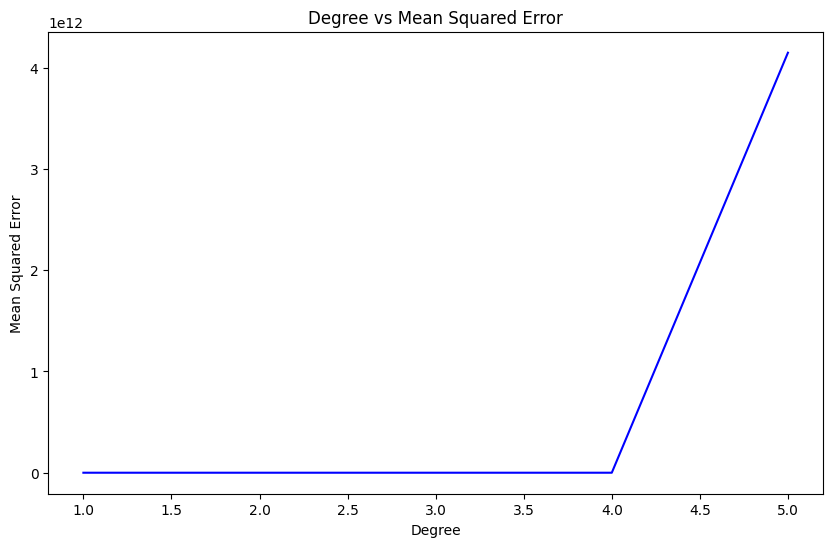

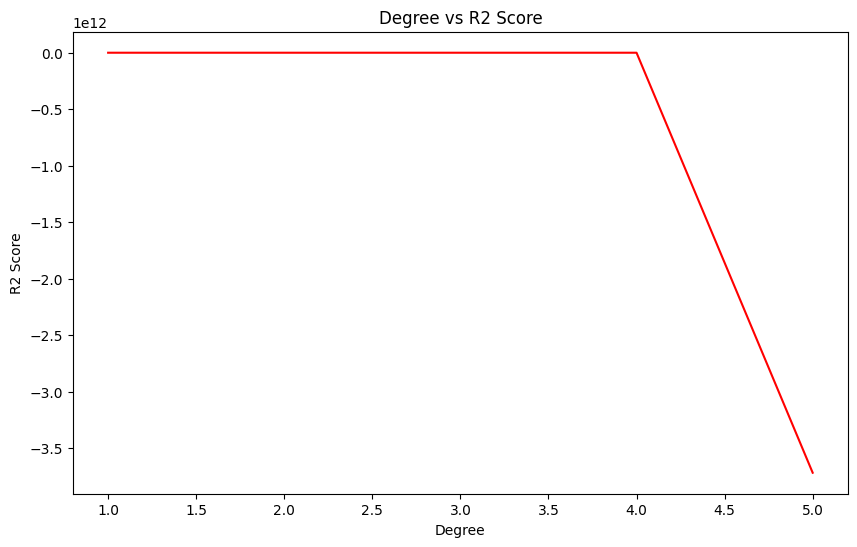

In [11]:
mean_sq_errors = []
r2_scores = []

table = PrettyTable()
table.field_names = ['Degree', 'Mean Squared Error', 'R2 Score']

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_scaled)

    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=RANDOM_SEED)

    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)

    Y_pred = lin_model.predict(X_test)

    mean_sq_errors.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(lin_model.score(X_test, Y_test))

    table.add_row([i, mean_squared_error(Y_test, Y_pred), lin_model.score(X_test, Y_test)])

print(table)


plt.figure(figsize=(10, 6))
plt.plot(range(1,6), mean_sq_errors, color='blue')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Degree vs Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1,6), r2_scores, color='red')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.title('Degree vs R2 Score')
plt.show()

### Residuals for 2nd degree polyfit

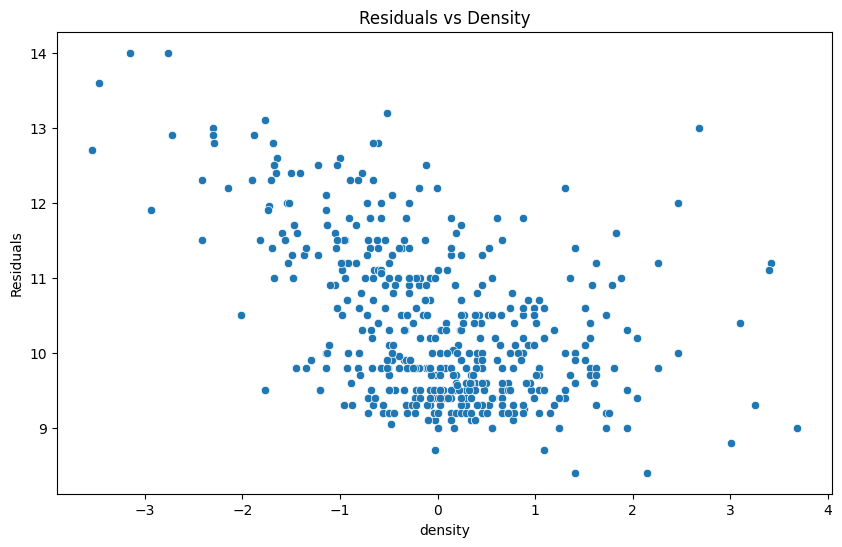

In [12]:
polyfit = PolynomialFeatures(degree=2)
X_poly = polyfit.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly)
X_poly.columns = polyfit.get_feature_names_out(X_scaled.columns)



X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=RANDOM_SEED)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

Y_pred = lin_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['density'], y=Y_test)
plt.xlabel('density')
plt.ylabel('Residuals')
plt.title('Residuals vs Density')
plt.show()



## Part 2 - Feature Selection

### Forward

Some code from: https://github.com/intro-stat-learning/ISLP_labs/blob/main/Ch06-varselect-lab.ipynb

In [13]:
!pip install ISLP
!pip install l0bnb

In [14]:
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [15]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n


In [16]:
def run_selection(X, Y, direction='forward'):

    K = 5

    design = MS(X).fit(X)
    X = design.transform(X)
    sigma2 = OLS(Y,X).fit().scale

    print(f"Sigma2 = {sigma2}")

    neg_Cp = partial(nCp, sigma2)

    strategy = Stepwise.first_peak(design,
                                direction=direction,
                                max_terms=len(design.terms))

    x_RSS = sklearn_selected(OLS, strategy)
    x_RSS.fit(X, Y)

    print(f"Selected state =\n{x_RSS.selected_state_}")

    x_Cp = sklearn_selected( OLS,
                                strategy,
                                scoring=neg_Cp)
    x_Cp.fit(X, Y)
    print(f"CP Selected state = \n{x_Cp.selected_state_}")

    strategy = Stepwise.fixed_steps(design,
                                    len(design.terms),
                                    direction=direction)
    full_path = sklearn_selection_path(OLS, strategy)

    full_path.fit(X, Y)
    Yhat_in = full_path.predict(X)
    print(Yhat_in.shape)

    rss_fig, ax = plt.subplots(figsize=(8,8))
    insample_rss = ((Yhat_in - Y[:,None])**2).sum(0)
    n_steps = insample_rss.shape[0]

    ax.plot(np.arange(n_steps),
            insample_rss/K,
            'k', # color black
            label='In-sample')
    ax.set_ylabel('RSS',
                fontsize=20)
    ax.set_xlabel(f'# steps of {direction} stepwise',
                fontsize=20)
    ax.set_xticks(np.arange(n_steps)[::2])
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend()


    kfold = skm.KFold(K,
                     random_state=0,
                     shuffle=True)
    Yhat_cv = skm.cross_val_predict(full_path,
                                    X,
                                    Y,
                                    cv=kfold)
    Yhat_cv.shape

    cv_rss = []
    cv_r2 = []
    for train_idx, test_idx in kfold.split(Y):
      errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2

      r2 = 1 - errors.sum(0) / ((Y[test_idx] - Y[test_idx].mean())**2).sum()

      cv_rss.append(errors.sum(0))
      cv_r2.append(r2)

    cv_rss = np.array(cv_rss).T
    cv_r2 = np.array(cv_r2).T

    ax.errorbar(np.arange(n_steps),
                cv_rss.mean(1),
                cv_rss.std(1) / np.sqrt(K),
                label='Cross-validated',
                c='r') # color red
    ax.legend()

    validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.2,
                              random_state=RANDOM_SEED)
    for train_idx, test_idx in validation.split(Y):
      full_path.fit(X.iloc[train_idx],
                        Y[train_idx])
      Yhat_val = full_path.predict(X.iloc[test_idx])
      errors = (Yhat_val - Y[test_idx,None])**2
      validation_rss = errors.sum(0)
      validation_r2 = 1 - errors.sum(0) / ((Y[test_idx] - Y[test_idx].mean())**2).sum()

    ax.plot(np.arange(n_steps),
    validation_rss,
      'b--', # color blue, broken line
      label='Validation')

    ax.set_xticks(np.arange(n_steps)[::2])

    ax.legend()

    plt.show()

    r2_fig, ax = plt.subplots(figsize=(8,8))

    insample_r2 = 1 - ((Yhat_in - Y[:,None])**2).sum(0) / ((Y[:,None] - Y.mean())**2).sum()
    n_steps = insample_r2.shape[0]

    ax.plot(np.arange(n_steps),
            insample_r2,
            'k', # color black
            label='In-sample')
    ax.set_ylabel('Adjusted R^2',
                fontsize=20)
    ax.set_xlabel(f'# steps of {direction} stepwise',
                fontsize=20)
    ax.set_xticks(np.arange(n_steps)[::2])
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend()

    ax.errorbar(np.arange(n_steps),
                cv_r2.mean(1),
                cv_r2.std(1) / np.sqrt(K),
                label='Cross-validated',
                c='r') # color red

    ax.legend()

    ax.plot(np.arange(n_steps),
    validation_r2,
      'b--', # color blue, broken line
      label='Validation')

    ax.set_xticks(np.arange(n_steps)[::2])

    ax.legend()

    plt.show()


Sigma2 = 0.2557082953382484
Selected state =
('chlorides', 'chlorides density', 'chlorides free sulfur dioxide', 'chlorides pH', 'chlorides quality', 'chlorides sulphates', 'chlorides total sulfur dioxide', 'chlorides^2', 'citric acid', 'citric acid chlorides', 'citric acid density', 'citric acid free sulfur dioxide', 'citric acid pH', 'citric acid quality', 'citric acid residual sugar', 'citric acid sulphates', 'citric acid total sulfur dioxide', 'citric acid^2', 'density', 'density pH', 'density quality', 'density sulphates', 'density^2', 'fixed acidity', 'fixed acidity chlorides', 'fixed acidity citric acid', 'fixed acidity density', 'fixed acidity free sulfur dioxide', 'fixed acidity pH', 'fixed acidity quality', 'fixed acidity residual sugar', 'fixed acidity sulphates', 'fixed acidity total sulfur dioxide', 'fixed acidity volatile acidity', 'fixed acidity^2', 'free sulfur dioxide', 'free sulfur dioxide density', 'free sulfur dioxide pH', 'free sulfur dioxide quality', 'free sulfur

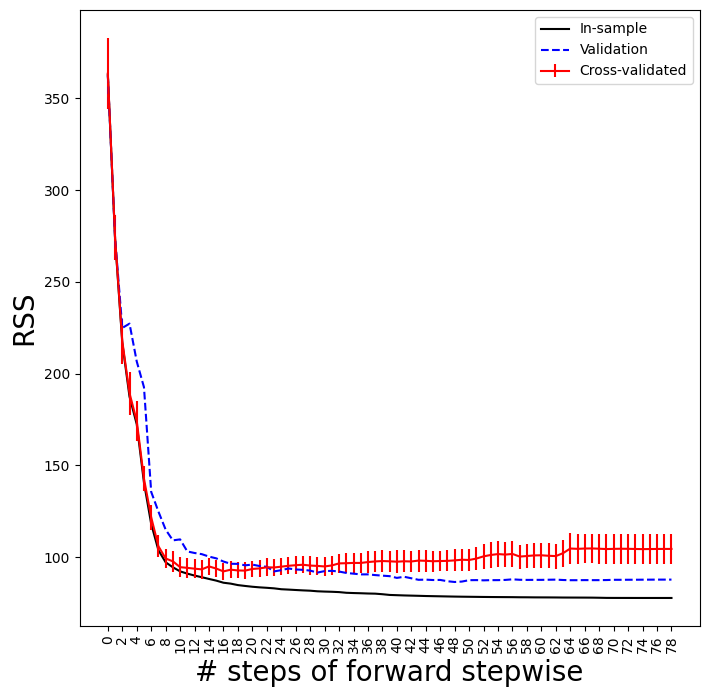

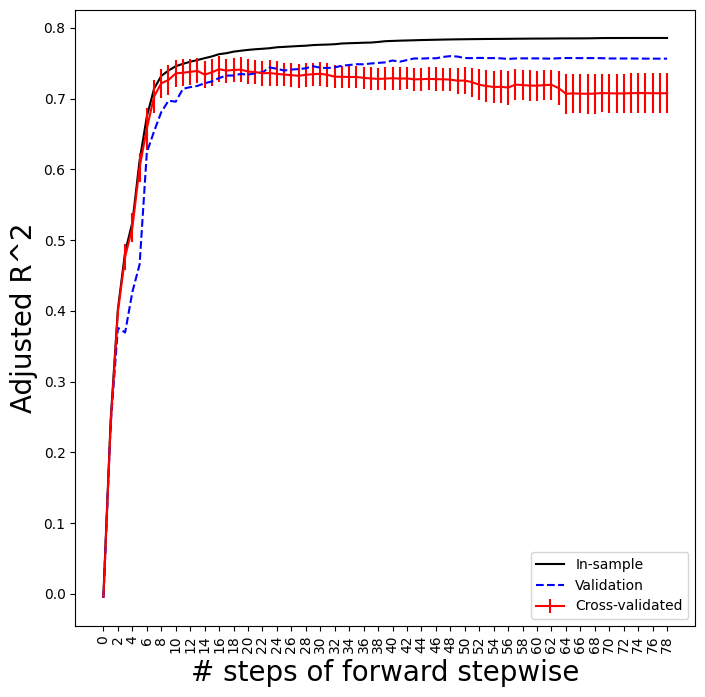

In [17]:
run_selection(X_poly, Y.to_numpy(), direction='forward')

Sigma2 = 0.2557082953382484
Selected state =
('chlorides', 'chlorides density', 'chlorides free sulfur dioxide', 'chlorides pH', 'chlorides quality', 'chlorides sulphates', 'chlorides total sulfur dioxide', 'chlorides^2', 'citric acid', 'citric acid chlorides', 'citric acid density', 'citric acid free sulfur dioxide', 'citric acid pH', 'citric acid quality', 'citric acid residual sugar', 'citric acid sulphates', 'citric acid total sulfur dioxide', 'citric acid^2', 'density', 'density pH', 'density quality', 'density sulphates', 'density^2', 'fixed acidity', 'fixed acidity chlorides', 'fixed acidity citric acid', 'fixed acidity density', 'fixed acidity free sulfur dioxide', 'fixed acidity pH', 'fixed acidity quality', 'fixed acidity residual sugar', 'fixed acidity sulphates', 'fixed acidity total sulfur dioxide', 'fixed acidity volatile acidity', 'fixed acidity^2', 'free sulfur dioxide', 'free sulfur dioxide density', 'free sulfur dioxide pH', 'free sulfur dioxide quality', 'free sulfur

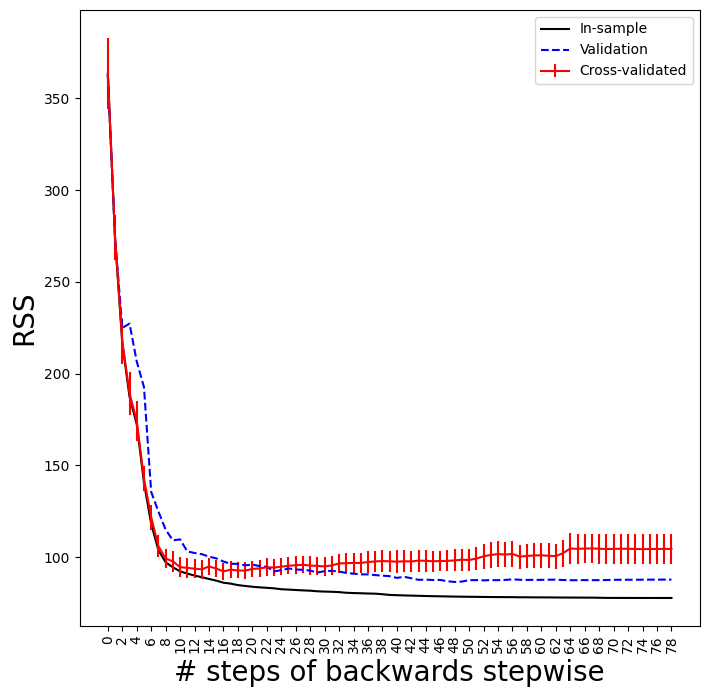

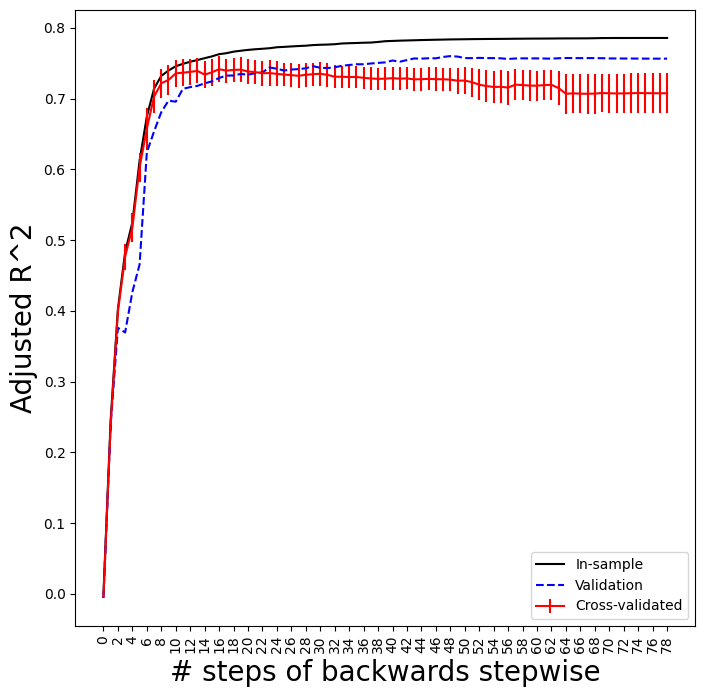

In [18]:
run_selection(X_poly, Y.to_numpy(), direction='backwards')

## PCR

(1599, 78)


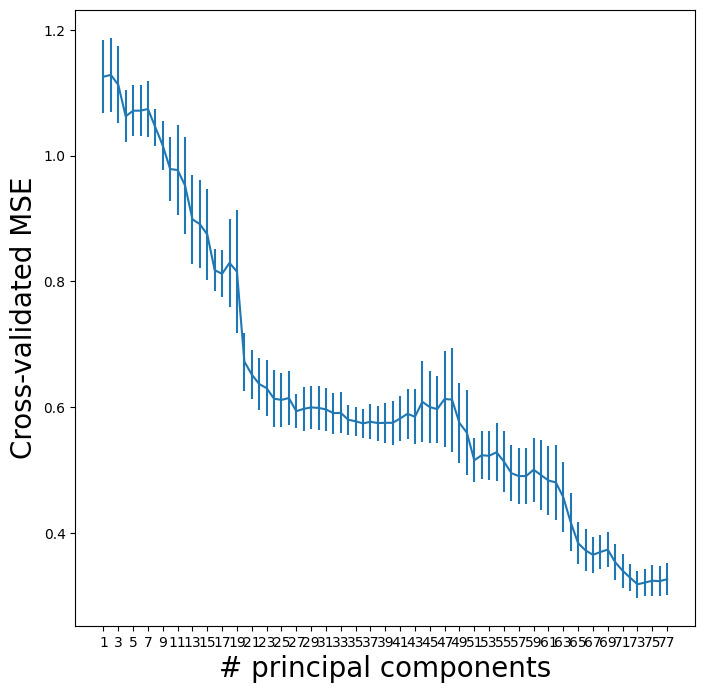

In [19]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

pca = PCA(n_components=25)

print(X_poly.shape)


linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])

param_grid = {'pca__n_components': range(1, X_poly.shape[1])}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X_poly, Y)


pcr_fig, ax = plt.subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
plt.show()




## Classification - Part 3

In [20]:
#For classification we are going to use quality
X_class = raw_data.drop('quality', axis=1)
Y_class = raw_data['quality']

#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_class_scaled = pd.DataFrame(scaler.fit_transform(X_class))

#Set column names back
X_class_scaled.columns = X_class.columns

#Get the counts of each quality
Y_class.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Logistic Regression

For this excercise we'll change the classification slightly so that quality is either "good" or "bad" depending on if the underlying quality score is > 5.

We'll start with simple regression

In [21]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

#Create new data based on Y_class["quality"] <= 5 == 0 and Y_class["quality"] >= 5 == 1
Z_class = Y_class.apply(lambda x: 1 if x > 5 else 0)

#Split the data into training and testing sets
X_train, X_test, Z_train, Z_test = train_test_split(X_class_scaled, Z_class, test_size=0.3, random_state=RANDOM_SEED)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Z_train)

#Predict the quality of the wine
Z_pred = logreg.predict(X_test)

#show the score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Z_test)))

#show the confusion matrix
print(confusion_matrix(Z_test, Z_pred))

#show the classification report
print(classification_report(Z_test, Z_pred))

Accuracy of logistic regression classifier on test set: 0.73
[[172  62]
 [ 68 178]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       234
           1       0.74      0.72      0.73       246

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



K-Fold Analysis across degrees

/Users/wortcook/.pyenv/versions/MLExp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wortcook/.pyenv/versions/MLExp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

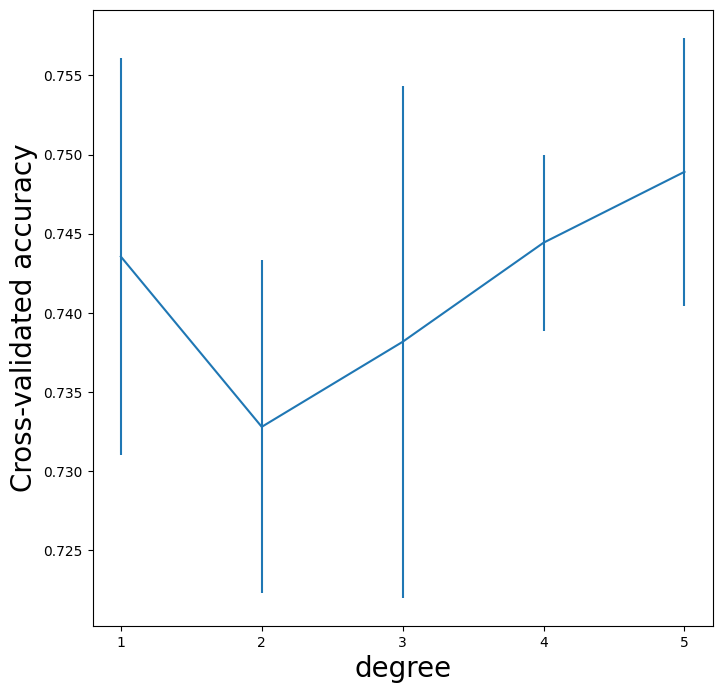

In [22]:
K = 5

from sklearn.preprocessing import PolynomialFeatures

kfold = skm.KFold(K,random_state=RANDOM_SEED,shuffle=True)

logreg = LogisticRegression()
poly = PolynomialFeatures()

pipe = Pipeline([('poly', poly), ('logreg', logreg)])

param_grid = {'poly__degree': range(1,6)}

grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

grid.fit(X_train, Z_train)

poly_fig, ax = plt.subplots(figsize=(8,8))
degrees = param_grid['poly__degree']
ax.errorbar(degrees,
            grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated accuracy', fontsize=20)
ax.set_xlabel('degree', fontsize=20)
ax.set_xticks(degrees)

plt.show()


### LDA

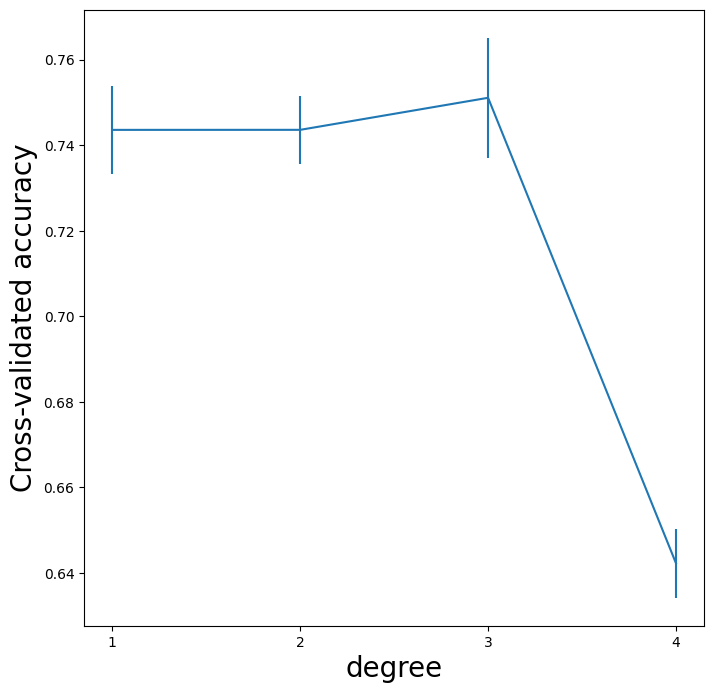

In [23]:
#import the Linear Discriminate Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

pipe = Pipeline([('poly', poly), ('lda', lda)])

param_grid = {'poly__degree': range(1,5)}

grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')

grid.fit(X_class_scaled, Z_class)

poly_fig, ax = plt.subplots(figsize=(8,8))
degrees = param_grid['poly__degree']
ax.errorbar(degrees,
            grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated accuracy', fontsize=20)
ax.set_xlabel('degree', fontsize=20)
ax.set_xticks(degrees)

plt.show()


Final Fits Based on cross validation

In [24]:
#Perform linear regression on the data

logreg = LogisticRegression()

#Get the 3 poly degree
poly = PolynomialFeatures(degree=5)

X_poly = poly.fit_transform(X_class_scaled)


#Split the data into training and testing sets
X_train, X_test, Z_train, Z_test = train_test_split(X_poly, Z_class, test_size=0.3, random_state=RANDOM_SEED)

#Fit the data

logreg.fit(X_train, Z_train)

#Predict the quality of the wine
Z_pred = logreg.predict(X_test)

#show the score
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Z_test)))

#show the confusion matrix
print(confusion_matrix(Z_test, Z_pred))

#show the classification report
print(classification_report(Z_test, Z_pred))

Accuracy of linear regression classifier on test set: 0.73
[[178  56]
 [ 73 173]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       234
           1       0.76      0.70      0.73       246

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



/Users/wortcook/.pyenv/versions/MLExp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LDA Final fit based on 3 poly

In [25]:
lda = LinearDiscriminantAnalysis()

#Get the 3 poly degree
poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X_class_scaled)

#Split the data into training and testing sets
X_train, X_test, Z_train, Z_test = train_test_split(X_poly, Z_class, test_size=0.3, random_state=RANDOM_SEED)

#Fit the data
lda.fit(X_train, Z_train)

#Predict the quality of the wine
Z_pred = lda.predict(X_test)

#show the score
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(lda.score(X_test, Z_test)))

#show the confusion matrix
print(confusion_matrix(Z_test, Z_pred))

#show the classification report
print(classification_report(Z_test, Z_pred))


Accuracy of linear regression classifier on test set: 0.72
[[165  69]
 [ 65 181]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       234
           1       0.72      0.74      0.73       246

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



# Section B

## Part 1 Splines and Step Functions

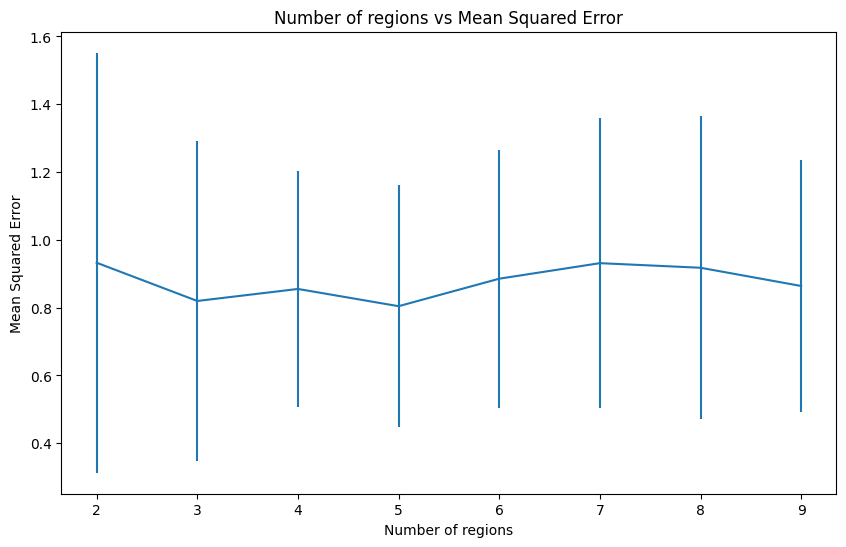

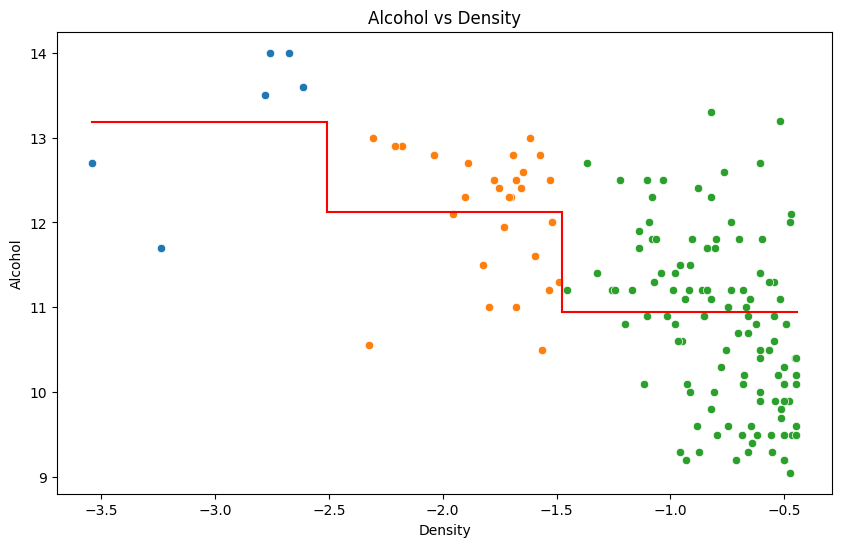

In [26]:
#Back to the alcohol prediction

X_density = X_scaled['density'].values.reshape(-1, 1)
Y_alcohol = Y.values.reshape(-1, 1)

#Break our density data into n regions

#Get the density min and max range
density_min = X_density.min()
density_max = X_density.max()

mse_vals = []
std_vals = []

for i in range(2,10):
    #Get the range of each region
    density_range = (density_max - density_min) / i
    
    mse = 0
    std = 0
    
    for j in range(1, i+1):
        #Get the min and max of the region
        min_range = density_min + density_range * (j-1)
        max_range = density_min + density_range * j
        
        #Get the index of the data in the region
        idx = np.where((X_density >= min_range) & (X_density <= max_range))
        
        #Get the data in the region
        X_density_region = X_density[idx]
        Y_region = Y_alcohol[idx]
        
        #Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_density_region, Y_region, test_size=0.3, random_state=RANDOM_SEED)
        
        #Find the average of the region
        avg = np.mean(Y_train)
        
        #Find the mean squared error
        mse += ((Y_test - avg) ** 2).mean()
        std += ((Y_test - avg) ** 2).std()/np.sqrt(8)
        
    mse_vals.append(mse/i)
    std_vals.append(std/i)
    
plt.figure(figsize=(10, 6))
plt.errorbar(range(2,10), mse_vals, yerr=std_vals)
plt.xlabel('Number of regions')
plt.ylabel('Mean Squared Error')
plt.title('Number of regions vs Mean Squared Error')
plt.show()

#For 7 regions plot the regression line

density_range = (density_max - density_min) / 7

plt.figure(figsize=(10, 6))

prev_avg = 0

for i in range(1, 4):
    min_range = density_min + density_range * (i-1)
    max_range = density_min + density_range * i
    
    idx = np.where((X_density >= min_range) & (X_density <= max_range))
    
    X_density_region = X_density[idx]
    Y_region = Y_alcohol[idx]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_density_region, Y_region, test_size=0.3, random_state=RANDOM_SEED)
    
    avg = np.mean(Y_train)
    
    sns.scatterplot(x=X_test.flatten(), y=Y_test)
    
    #plot line from min_range to max_range
    plt.plot([min_range, max_range], [avg, avg], color='red')
    
    
    
    #connect each region with a line
    if i != 1:
        plt.plot([min_range, min_range], [prev_avg, avg], color='red')
        
    prev_avg = avg
    
    
    
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Density')
plt.show()



### Spline Fitting

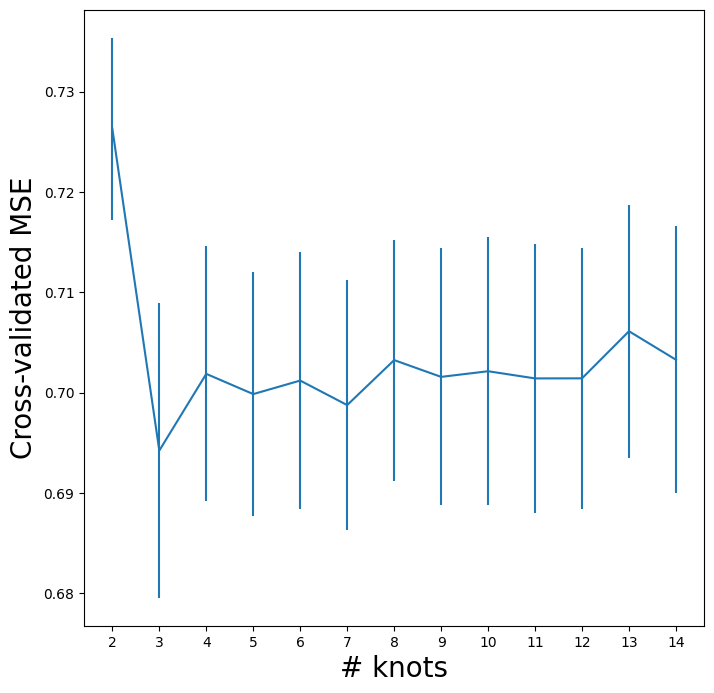

In [27]:
from sklearn.preprocessing import SplineTransformer

K = 5

kfold = skm.KFold(K, random_state=RANDOM_SEED, shuffle=True)

spline = SplineTransformer(n_knots=10, degree=3)

pipe = Pipeline([('spline', spline), ('linreg', linreg)])

param_grid = {'spline__n_knots': range(2, 15)}

grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')

grid.fit(X_density, Y_alcohol)

spline_fig, ax = plt.subplots(figsize=(8,8))
n_knots = param_grid['spline__n_knots']
ax.errorbar(n_knots,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# knots', fontsize=20)
ax.set_xticks(n_knots)

plt.show()


Show the regression for a 3 knot fit

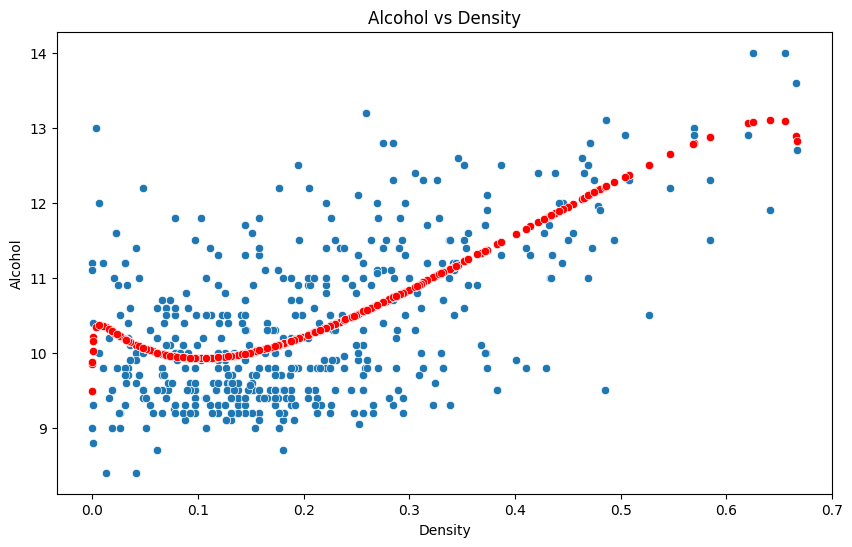

In [29]:
spline_transformer = SplineTransformer(n_knots=3, degree=3)

X_spline = spline_transformer.fit_transform(X_density)

X_train, X_test, Y_train, Y_test = train_test_split(X_spline, Y_alcohol, test_size=0.3, random_state=RANDOM_SEED)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

Y_pred = lin_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:,1], y=Y_test.flatten())
sns.scatterplot(x=X_test[:,1], y=Y_pred.flatten(), color='red')
plt.ylabel('Alcohol')
plt.xlabel('Density')
plt.title('Alcohol vs Density')
plt.show()

## Part 2 - Trees and Support Vector Machines

### Trees

Accuracy of classification tree classifier on test set: 0.67
[[155  79]
 [ 80 166]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       234
           1       0.68      0.67      0.68       246

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.67      0.67      0.67       480



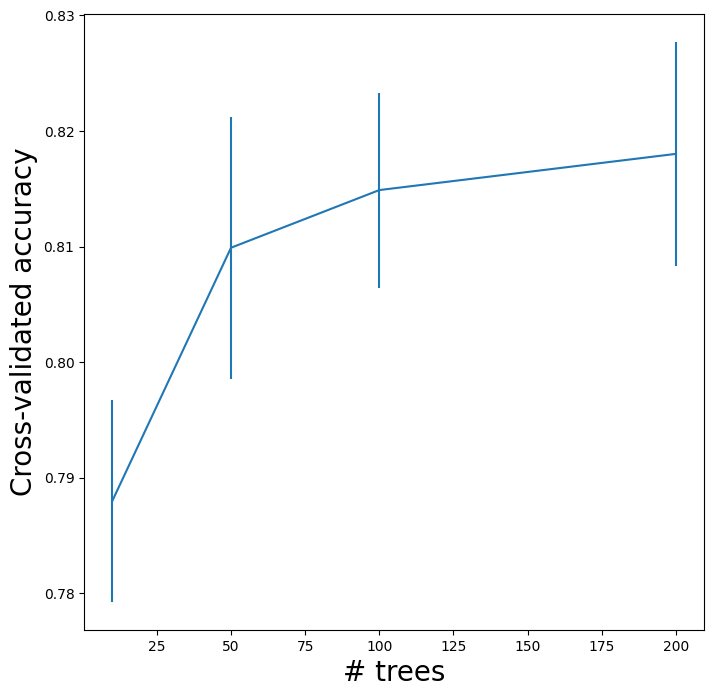

{'n_estimators': 200}
Accuracy of random forest classifier on test set: 0.79
[[188  46]
 [ 54 192]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       234
           1       0.81      0.78      0.79       246

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



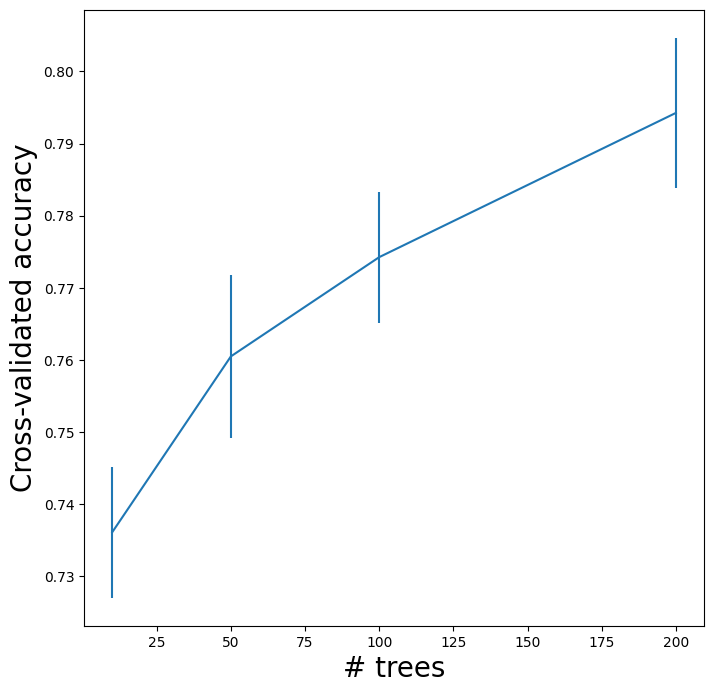

{'n_estimators': 200}
Accuracy of gradient boosting classifier on test set: 0.79
[[182  52]
 [ 48 198]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       234
           1       0.79      0.80      0.80       246

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#split the data into training and testing sets
X_train, X_test, Z_train, Z_test = train_test_split(X_class_scaled, Z_class, test_size=0.3, random_state=RANDOM_SEED)

class_tree = DecisionTreeClassifier()

class_tree.fit(X_train, Z_train)

Z_pred = class_tree.predict(X_test)

print('Accuracy of classification tree classifier on test set: {:.2f}'.format(class_tree.score(X_test, Z_test)))
print(confusion_matrix(Z_test, Z_pred))
print(classification_report(Z_test, Z_pred))

rf = RandomForestClassifier()
K = 5

kfold = skm.KFold(K, random_state=RANDOM_SEED, shuffle=True)

param_grid = {'n_estimators': [10, 50, 100, 200, 500, 1000, 2000]}
grid = skm.GridSearchCV(rf, param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_class_scaled, Z_class)

rf_fig, ax = plt.subplots(figsize=(8,8))
n_estimators = param_grid['n_estimators']
ax.errorbar(n_estimators,
            grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated accuracy', fontsize=20)
ax.set_xlabel('# trees', fontsize=20)
plt.show()

#Get the best parameters
print(grid.best_params_)


rf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])

rf.fit(X_train, Z_train)

Z_pred = rf.predict(X_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, Z_test)))
print(confusion_matrix(Z_test, Z_pred))
print(classification_report(Z_test, Z_pred))

gb = GradientBoostingClassifier()

param_grid = {'n_estimators': [10, 50, 100, 200, 500, 1000]}
grid = skm.GridSearchCV(gb, param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_class_scaled, Z_class)

gb_fig, ax = plt.subplots(figsize=(8,8))
n_estimators = param_grid['n_estimators']
ax.errorbar(n_estimators,
            grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated accuracy', fontsize=20)
ax.set_xlabel('# trees', fontsize=20)
plt.show()

#Get the best parameters
print(grid.best_params_)

gp = GradientBoostingClassifier(n_estimators=grid.best_params_['n_estimators'])

gp.fit(X_train, Z_train)

Z_pred = gp.predict(X_test)

print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(gp.score(X_test, Z_test)))
print(confusion_matrix(Z_test, Z_pred))
print(classification_report(Z_test, Z_pred))

### SVC

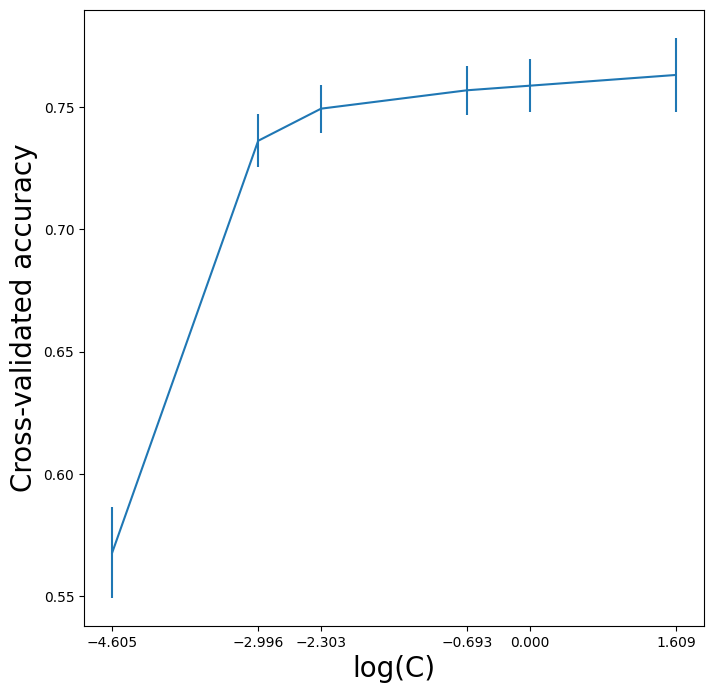

{'C': 5}
Accuracy of support vector classifier on test set: 0.75
[[179  55]
 [ 66 180]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       234
           1       0.77      0.73      0.75       246

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [34]:
from sklearn.svm import SVC

K = 5

kfold = skm.KFold(K, random_state=RANDOM_SEED, shuffle=True)

#split the data into training and testing sets
X_train, X_test, Z_train, Z_test = train_test_split(X_class_scaled, Z_class, test_size=0.3, random_state=RANDOM_SEED)

#Create a support vector classifier with a radial basis function kernel
svc = SVC(kernel='rbf')

c_vals = [0.01, 0.05, 0.1, 0.5, 1, 5]

param_grid = {'C': c_vals}

grid = skm.GridSearchCV(svc, param_grid, cv=kfold, scoring='accuracy')

grid.fit(X_class_scaled, Z_class)

#show grid against log of c values
svc_fig, ax = plt.subplots(figsize=(8,8))
c_vals = param_grid['C']
ax.errorbar(np.log(c_vals),
            grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))

ax.set_ylabel('Cross-validated accuracy', fontsize=20)
ax.set_xlabel('log(C)', fontsize=20)
ax.set_xticks(np.log(c_vals))

plt.show()

#Get the best parameters
print(grid.best_params_)
svc = SVC(kernel='rbf', C=grid.best_params_['C'])

svc.fit(X_train, Z_train)

Z_pred = svc.predict(X_test)

print('Accuracy of support vector classifier on test set: {:.2f}'.format(svc.score(X_test, Z_test)))
print(confusion_matrix(Z_test, Z_pred))
print(classification_report(Z_test, Z_pred))

Do PCA of 2 then use best C value to produce boundary

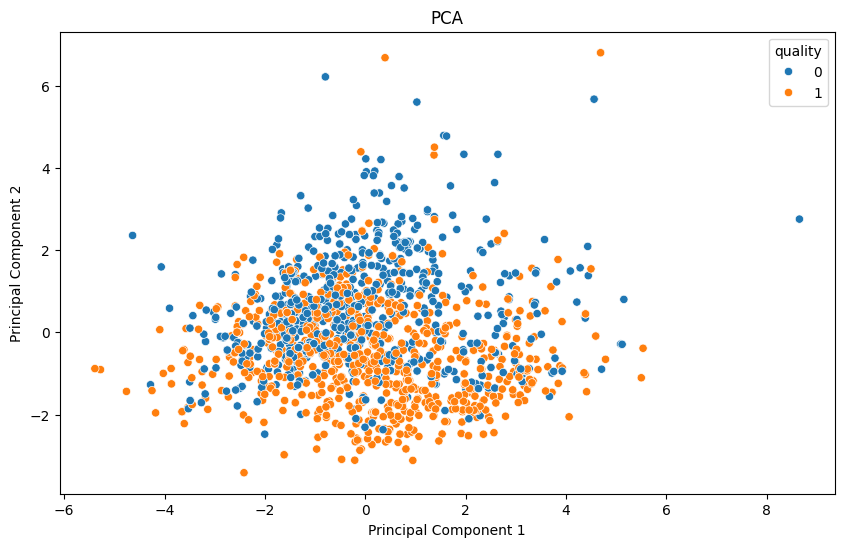

In [35]:
#Create support vector classifier with a rbf kernel
svc = SVC(kernel='rbf', C=grid.best_params_['C'])

#Do PCA on the data to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_class_scaled)

#Predict the quality of the wine
Z_pred = svc.fit(X_pca, Z_class).predict(X_pca)

#Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=Z_class)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

